# cluster analysis of seasonal / hourly mean diurnal cycle

#### uses k-means first (from 2 to 10 clusters) then Affinity Propagation

+ [Affinity Propagation enty on wikipedia](https://en.wikipedia.org/wiki/Affinity_propagation)
+ [Frey and Dueck paper in Science](http://science.sciencemag.org/content/315/5814/972)

In [1]:
%config InlineBackend.figure_formats = {'svg','retina'} 

In [2]:
%matplotlib inline
from matplotlib import pyplot as plt

In [3]:
from glob import glob

In [4]:
import os, sys

In [5]:
import numpy as np
from numpy import ma
import pandas as pd

In [6]:
np.random.seed(42)

In [7]:
geodata = pd.read_csv('../data/geo_subset.csv', index_col=0)

In [8]:
geodata.head()

,NOM_USUEL,LON_DG,LAT_DG,LAMBX_100,LAMBY_100,ALTI
NUM_POSTE,,,,,,
98801001,BELEP AEROD.,163.659667,-19.721167,1545.75,4950.98,82
98802003,BOURAKE,165.999833,-21.942500,3999.83,2510.11,53
98802008,NASSIRAH,166.063167,-21.815000,4065.31,2651.26,52
98803001,BOURAIL,165.493833,-21.554833,3475.75,2938.45,25
98803002,LE CAP MAORI,165.365167,-21.480667,3342.15,3020.06,70


### loads the mean seasonal / hourly cycle: filtered, but not normalised 

In [9]:
lfiles = glob('../outputs/seasonal_hourly_mean_cycle_f_98*.csv')

In [10]:
lfiles.__len__()

46

In [11]:
d = {}

In [12]:
from sklearn.preprocessing import MinMaxScaler

In [13]:
scaler = MinMaxScaler()

In [14]:
for fname in lfiles: 
    station = fname.split('_')[-1].split('.')[0]
    data = pd.read_csv(fname, index_col=0)
    data = data.stack()
    d[station] = data.values

In [15]:
df = pd.DataFrame(d)

In [16]:
df.head()

,98801001,98802003,98802008,98803001,98803002,98803003,98803006,98804001,98805001,98807001,...,98825001,98826002,98827001,98827002,98829003,98830002,98832002,98832003,98832004,98832006
0,0.215855,0.080310,0.122448,0.112249,0.099996,0.146603,0.250988,0.388823,0.203376,0.429976,...,0.130264,0.204193,0.093152,0.092416,0.712906,0.518455,0.395576,0.315355,0.380125,0.440688
1,0.190499,0.080117,0.149639,0.137140,0.123268,0.148298,0.227465,0.388872,0.194512,0.479867,...,0.095373,0.215791,0.089322,0.100034,0.634432,0.445421,0.490035,0.400868,0.387427,0.377061
2,0.240665,0.093718,0.139339,0.130933,0.176435,0.125915,0.251535,0.387964,0.216574,0.478583,...,0.101897,0.233468,0.120890,0.100704,0.444184,0.454036,0.461610,0.380844,0.414955,0.416056
3,0.240518,0.059968,0.103197,0.120654,0.126580,0.103178,0.222715,0.319905,0.168644,0.498887,...,0.097293,0.205100,0.110905,0.103382,0.499387,0.563699,0.501565,0.394494,0.382060,0.379592
4,0.315065,0.066153,0.108389,0.079450,0.094781,0.090245,0.187247,0.258306,0.179539,0.495496,...,0.084694,0.226967,0.094640,0.095120,0.397852,0.488633,0.519622,0.403207,0.395576,0.455737


In [17]:
def scale(x): 
    z = (x - x.min()) / (x.max() - x.min())
    return z

In [18]:
df = df.apply(scale)

In [19]:
df = df.T

In [20]:
df.head()

,0,1,2,3,4,5,6,7,8,9,...,278,279,280,281,282,283,284,285,286,287
98801001,0.478967,0.414531,0.542017,0.541642,0.731088,0.616783,0.434205,0.384321,0.588078,0.329835,...,0.222456,0.243788,0.437229,0.276650,0.197850,0.542670,0.584864,0.360590,0.434087,0.348609
98802003,0.313616,0.312808,0.369845,0.228309,0.254249,0.165732,0.207348,0.277021,0.272650,0.300482,...,0.321267,0.285864,0.640772,0.343337,0.218862,0.362042,0.334253,0.291089,0.221605,0.168382
98802008,0.190828,0.237303,0.219699,0.157925,0.166800,0.166219,0.195007,0.150771,0.152774,0.196544,...,0.485255,0.494408,0.448489,0.352508,0.363608,0.379533,0.358031,0.210044,0.184748,0.095270
98803001,0.128944,0.166784,0.157348,0.141721,0.079085,0.116201,0.104322,0.075393,0.114343,0.137238,...,0.342698,0.468279,0.583918,0.372749,0.318364,0.196721,0.180854,0.176764,0.091931,0.151459
98803002,0.077260,0.103337,0.162911,0.107048,0.071416,0.074097,0.130812,0.088277,0.101344,0.075120,...,0.318918,0.540699,0.415005,0.390929,0.257367,0.172645,0.129034,0.114504,0.090374,0.129838


In [21]:
from sklearn.cluster import KMeans
from sklearn.cluster import AffinityPropagation as AP

In [22]:
from mpl_toolkits.basemap import Basemap as bm

In [23]:
lat = geodata.LAT_DG.values
lon = geodata.LON_DG.values

In [24]:
m = bm(projection='cyl', llcrnrlat=lat.min()-0.25, urcrnrlat=lat.max()+0.25, \
       llcrnrlon=lon.min()-0.25, urcrnrlon=lon.max()+0.25, resolution='f')

### cluster analysis with Affinity Propagation

In [25]:
af = AP().fit(df.values)
cluster_centers_indices = af.cluster_centers_indices_
labels = af.labels_

n_clusters_ = len(cluster_centers_indices)

print('Estimated number of clusters: %d' % n_clusters_)

Estimated number of clusters: 6


In [26]:
labels

array([4, 3, 1, 1, 1, 1, 1, 5, 1, 4, 3, 1, 0, 1, 1, 1, 1, 1, 1, 1, 2, 2, 5,
       2, 5, 3, 4, 3, 3, 0, 3, 1, 3, 4, 1, 4, 1, 5, 1, 1, 4, 4, 4, 5, 5, 5])

In [27]:
labels_df = pd.DataFrame(labels, index=list(map(int,df.index)), columns=['cluster_AP'])

In [28]:
geodata.loc[:,'cluster_AP'] = labels_df['cluster_AP']

In [29]:
from matplotlib import style

In [30]:
style.use('classic')

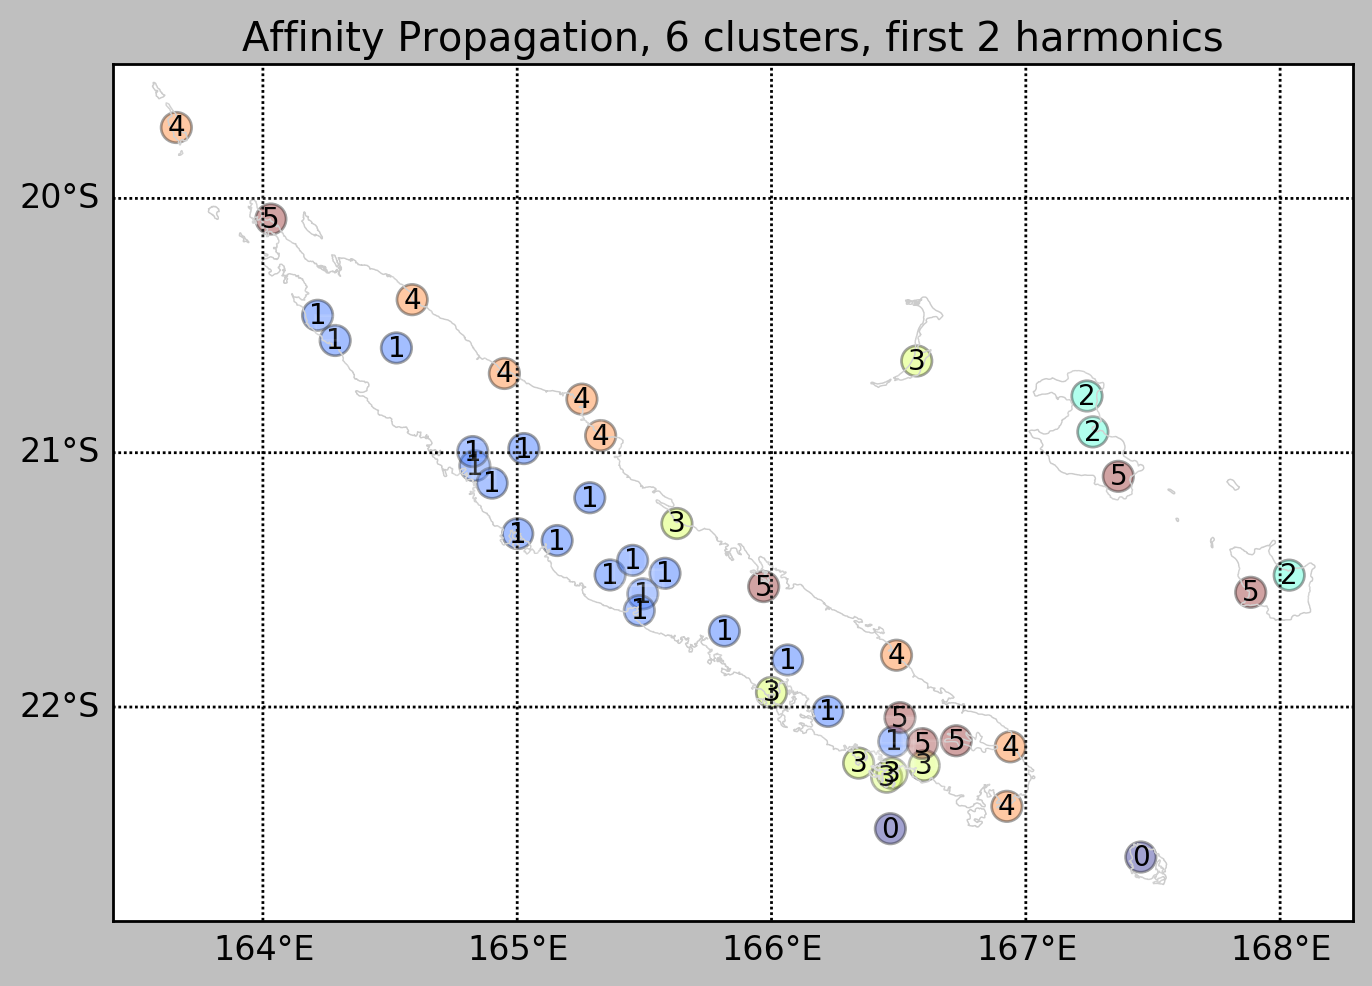

In [42]:
f, ax = plt.subplots(figsize=(8,6))
m.ax = ax
m.drawcoastlines(color='0.8',linewidth=0.5)

m.scatter(lon,lat,s=120, c=geodata.cluster_AP, alpha=0.4)

m.drawparallels(np.arange(-90.,90.,1), labels=[1,0,0,0])
m.drawmeridians(np.arange(-180.,180.,1), labels=[0,0,0,1]);

x,y = m(lon,lat)
clusters_labels = list(map(str,geodata.cluster_AP.values.astype(np.int)))
for i in range(len(clusters_labels)): 
    ax.text(x[i],y[i],clusters_labels[i], \
            horizontalalignment='center',verticalalignment='center',\
           bbox=dict(facecolor='w', edgecolor='w',alpha=0.1), fontsize=10)
    
ax.set_title('Affinity Propagation, {} clusters, first 2 harmonics'.format(n_clusters_))

f.savefig('../figures/classif_{}clusters_AP_f.png'.format(n_clusters_), dpi=200)

### get the exemplars

In [32]:
cluster_centers_indices

array([12, 19, 20, 28, 41, 44])

In [33]:
exemplars = df.iloc[cluster_centers_indices,:]
exemplars = exemplars.values.reshape(n_clusters_,12,24)

In [34]:
df.iloc[cluster_centers_indices,:].index

Index(['98809001', '98813001', '98814001', '98818002', '98830002', '98832004'], dtype='object')

In [35]:
exemplars_df = geodata.ix[map(int, df.iloc[cluster_centers_indices,:].index)]

In [38]:
exemplars_df.index = range(6)

In [39]:
exemplars_df

,NOM_USUEL,LON_DG,LAT_DG,LAMBX_100,LAMBY_100,ALTI,cluster_AP
0,MOUE,167.452167,-22.589833,5493.39,1786.42,95,0
1,LA FOA,165.814667,-21.701333,3808.24,2777.00,12,1
2,OUANAHAM,167.240500,-20.777000,5291.64,3795.25,30,2
3,MAGENTA,166.473667,-22.260333,4488.22,2157.47,3,3
4,TOUHO AEROD.,165.254500,-20.789333,3223.83,3784.87,2,4
5,MTGNE SOURCES,166.593167,-22.143833,4611.89,2286.04,773,5
